In [20]:
%matplotlib widget

# Beveridge Curve

This brief notebook shows the Beveridge Curve in the US, and does that loading data from the FRED database.
Some code base is therefore very similar to other notebooks.

Notes about this curve and chart can be found at:
* https://fredblog.stlouisfed.org/2014/05/the-beveridge-curve/?utm_source=series_page&utm_medium=related_content&utm_term=related_resources&utm_campaign=fredblog
* https://fredblog.stlouisfed.org/2017/11/the-full-banana-of-the-labor-market/?utm_source=series_page&utm_medium=related_content&utm_term=related_resources&utm_campaign=fredblog
* https://www.federalreserve.gov/econres/notes/feds-notes/what-does-the-beveridge-curve-tell-us-about-the-likelihood-of-a-soft-landing-20220729.html
* https://www.piie.com/blogs/realtime-economic-issues-watch/fed-wrong-lower-inflation-unlikely-without-raising

There was also an article on Bloomberg on the 6th January 2023 that highlighted the Beveridge Curve and how to interpret that in the context of a US recession (or not). See below chart that is in essence reproduced in this notebook and at the links above.

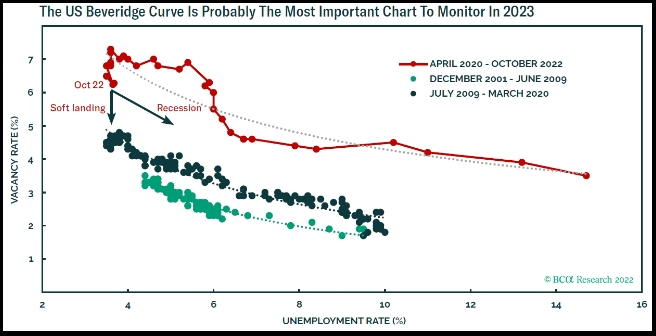

In [21]:
import pandas as pd
import seaborn as sns
from fredapi import Fred as FredApi

fred = FredApi(api_key='0dfcbb403eea7fee006f01e935be9216')

In [22]:
# load datasets
ur = fred.get_series_latest_release('UNRATE')
nfjo = fred.get_series_latest_release('JTSJOR')

In [23]:
# now merge and explore briefly if needed
data = pd.concat([ur, nfjo], axis=1)
data = data.resample('M').mean()
data.columns = ['Unemployment Rate', 'Nonfarm Vacancy Rate']
data.index.name = 'Date'
# clean up the data by dropping any NaN rows
data = data.dropna()
data.tail()

,Unemployment Rate,Nonfarm Vacancy Rate
Date,,
2022-07-31,3.5,6.8
2022-08-31,3.7,6.3
2022-09-30,3.5,6.5
2022-10-31,3.7,6.4
2022-11-30,3.6,6.4


In [24]:
# then add some categorical values to data
data['year'] = data.index.year
# define the categories "pre/post-financial crisis" and "post-covid"
data['category'] = 'pre-GFC'
data.loc[data.index > '2008-12-31', 'category'] = 'post-GFC'
data.loc[data.index > '2020-03-31', 'category'] = 'post-Covid'
data.tail()

,Unemployment Rate,Nonfarm Vacancy Rate,year,category
Date,,,,
2022-07-31,3.5,6.8,2022,post-Covid
2022-08-31,3.7,6.3,2022,post-Covid
2022-09-30,3.5,6.5,2022,post-Covid
2022-10-31,3.7,6.4,2022,post-Covid
2022-11-30,3.6,6.4,2022,post-Covid


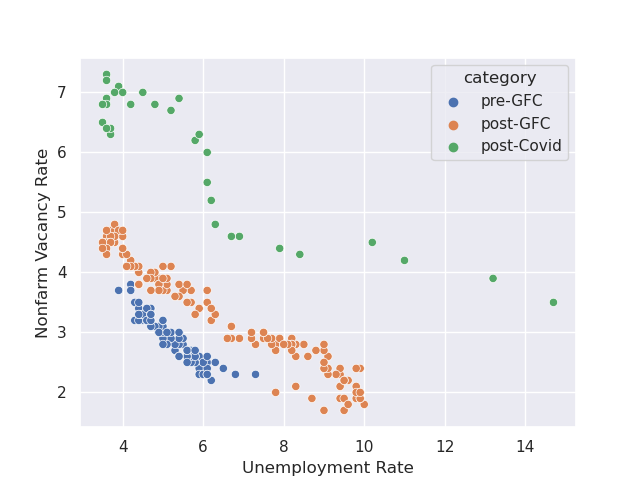

In [25]:
sns.set_theme()
sns.scatterplot(data, x='Unemployment Rate', y='Nonfarm Vacancy Rate', hue='category');